In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import seaborn as sns


In [7]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [8]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
df.dtypes


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

<AxesSubplot:>

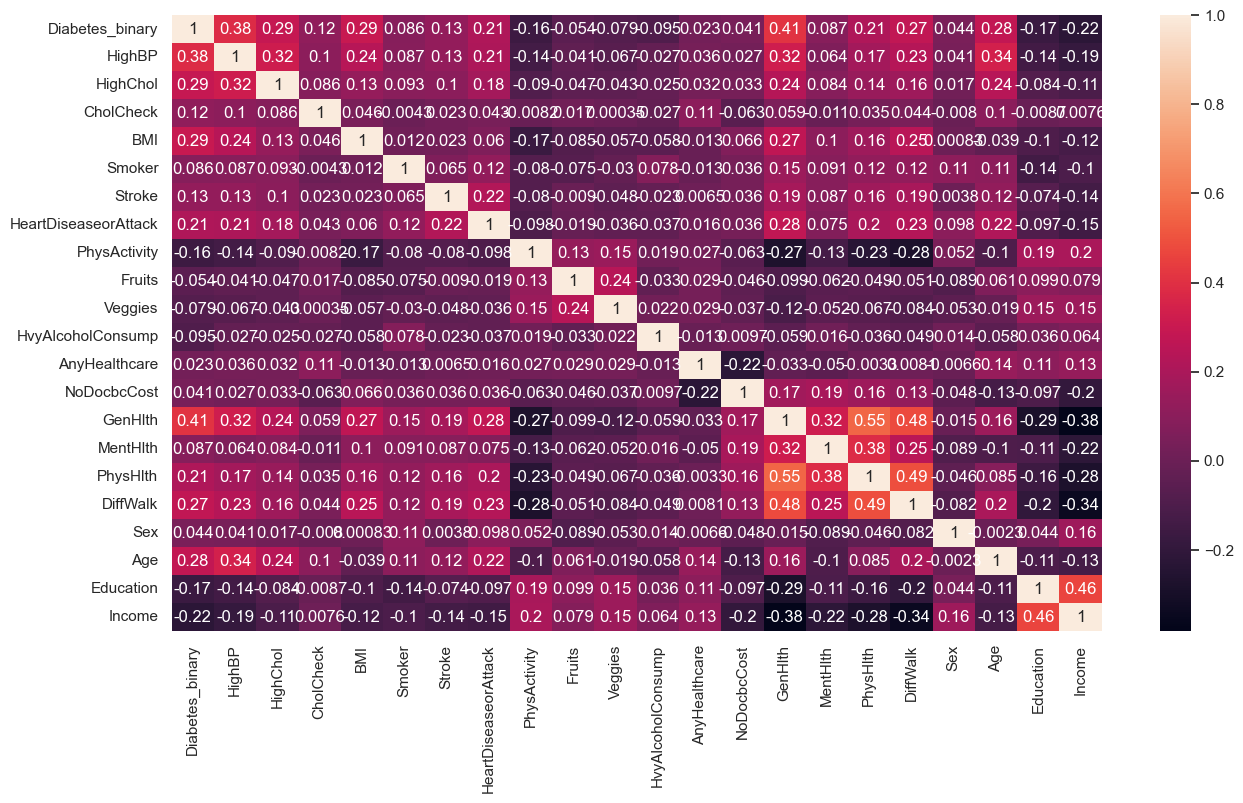

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot =True)

In [13]:
df.corr()
        

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


In [14]:
col = ['CholCheck','Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'PhysHlth','Fruits','Veggies', 'HvyAlcoholConsump','AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex', 'Age', 'Education', 'Income','HighChol','BMI','DiffWalk']
df_selected = df.drop(col, axis=1)
df_selected.head()

,Diabetes_binary,HighBP,GenHlth
0,0.0,1.0,3.0
1,0.0,1.0,3.0
2,0.0,0.0,1.0
3,0.0,1.0,3.0
4,0.0,0.0,2.0


<AxesSubplot:>

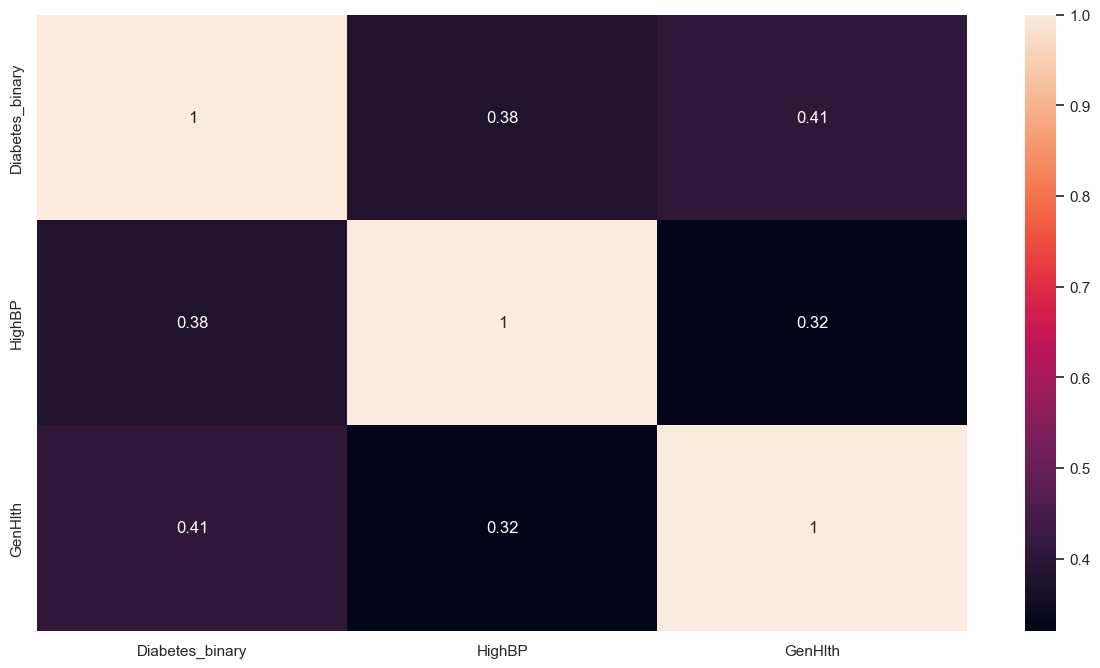

In [15]:
sns.heatmap(df_selected.corr(),annot =True)

In [16]:
df_selected.corr()

,Diabetes_binary,HighBP,GenHlth
Diabetes_binary,1.000000,0.381516,0.407612
HighBP,0.381516,1.000000,0.320540
GenHlth,0.407612,0.320540,1.000000


In [17]:
df_selected.isnull().sum()

Diabetes_binary    0
HighBP             0
GenHlth            0
dtype: int64

In [18]:
df_selected.describe()

,Diabetes_binary,HighBP,GenHlth
count,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,2.837082
std,0.500004,0.495960,1.113565
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.500000,1.000000,3.000000
75%,1.000000,1.000000,4.000000
max,1.000000,1.000000,5.000000


In [19]:
df_selected['z_socre_HighBP']=zscore(df_selected.HighBP, ddof=0)
df_selected['z_socre_GenHlth']=zscore(df_selected.GenHlth, ddof=0)


df_selected

,Diabetes_binary,HighBP,GenHlth,z_socre_HighBP,z_socre_GenHlth
0,0.0,1.0,3.0,0.880201,0.146304
1,0.0,1.0,3.0,0.880201,0.146304
2,0.0,0.0,1.0,-1.136104,-1.649743
3,0.0,1.0,3.0,0.880201,0.146304
4,0.0,0.0,2.0,-1.136104,-0.751719
...,...,...,...,...,...
70687,1.0,0.0,4.0,-1.136104,1.044328
70688,1.0,0.0,2.0,-1.136104,-0.751719
70689,1.0,1.0,5.0,0.880201,1.942351
70690,1.0,1.0,4.0,0.880201,1.044328


In [20]:
print(df_selected[(df_selected.z_socre_HighBP > 3)])
print(df_selected[(df_selected.z_socre_GenHlth > 3)])


Empty DataFrame
Columns: [Diabetes_binary, HighBP, GenHlth, z_socre_HighBP, z_socre_GenHlth]
Index: []
Empty DataFrame
Columns: [Diabetes_binary, HighBP, GenHlth, z_socre_HighBP, z_socre_GenHlth]
Index: []


In [21]:
print(df_selected[(df_selected.z_socre_HighBP < -3)])
print(df_selected[(df_selected.z_socre_GenHlth < -3)])


Empty DataFrame
Columns: [Diabetes_binary, HighBP, GenHlth, z_socre_HighBP, z_socre_GenHlth]
Index: []
Empty DataFrame
Columns: [Diabetes_binary, HighBP, GenHlth, z_socre_HighBP, z_socre_GenHlth]
Index: []


In [22]:
df_selected.describe()

,Diabetes_binary,HighBP,GenHlth,z_socre_HighBP,z_socre_GenHlth
count,70692.000000,70692.000000,70692.000000,7.069200e+04,7.069200e+04
mean,0.500000,0.563458,2.837082,-1.365531e-13,2.386822e-13
std,0.500004,0.495960,1.113565,1.000007e+00,1.000007e+00
min,0.000000,0.000000,1.000000,-1.136104e+00,-1.649743e+00
25%,0.000000,0.000000,2.000000,-1.136104e+00,-7.517193e-01
50%,0.500000,1.000000,3.000000,8.802011e-01,1.463042e-01
75%,1.000000,1.000000,4.000000,8.802011e-01,1.044328e+00
max,1.000000,1.000000,5.000000,8.802011e-01,1.942351e+00


In [23]:
x = pd.DataFrame(np.c_[df_selected['HighBP'], df_selected['GenHlth']], columns=['HighBP','GenHlth'])
y = df_selected.Diabetes_binary
print(x)
print(y)

       HighBP  GenHlth
0         1.0      3.0
1         1.0      3.0
2         0.0      1.0
3         1.0      3.0
4         0.0      2.0
...       ...      ...
70687     0.0      4.0
70688     0.0      2.0
70689     1.0      5.0
70690     1.0      4.0
70691     1.0      2.0

[70692 rows x 2 columns]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35346, 2)
(35346,)
(35346, 2)
(35346,)


In [25]:
model = KNeighborsClassifier(n_neighbors=500)
model.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=500)

In [26]:
y_predicted = model.predict(x_test)
count_0=[]
count_1=[]
for i in y_predicted:
    if i != 0:
        count_1.append(i)
    else:
        count_0.append(i)
print("Class 0 =",len(count_0))       
print("class 1=" ,len(count_1))

Class 0 = 14087
class 1= 21259


In [27]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

alphas = np.logspace(-3, 3, num=100)
l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
clf = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=l1_ratios, Cs=alphas, cv=5, class_weight='balanced')
clf.fit(x_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87...
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                     class_weight='balanced', cv=5,
                     l1_ratios=[0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                     penalty='elasticnet', solver='saga')

In [28]:
y_training = []

for i in y_train:
    i = int(i)
    y_training.append(i)

C:\Users\Teerawat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


([], [])

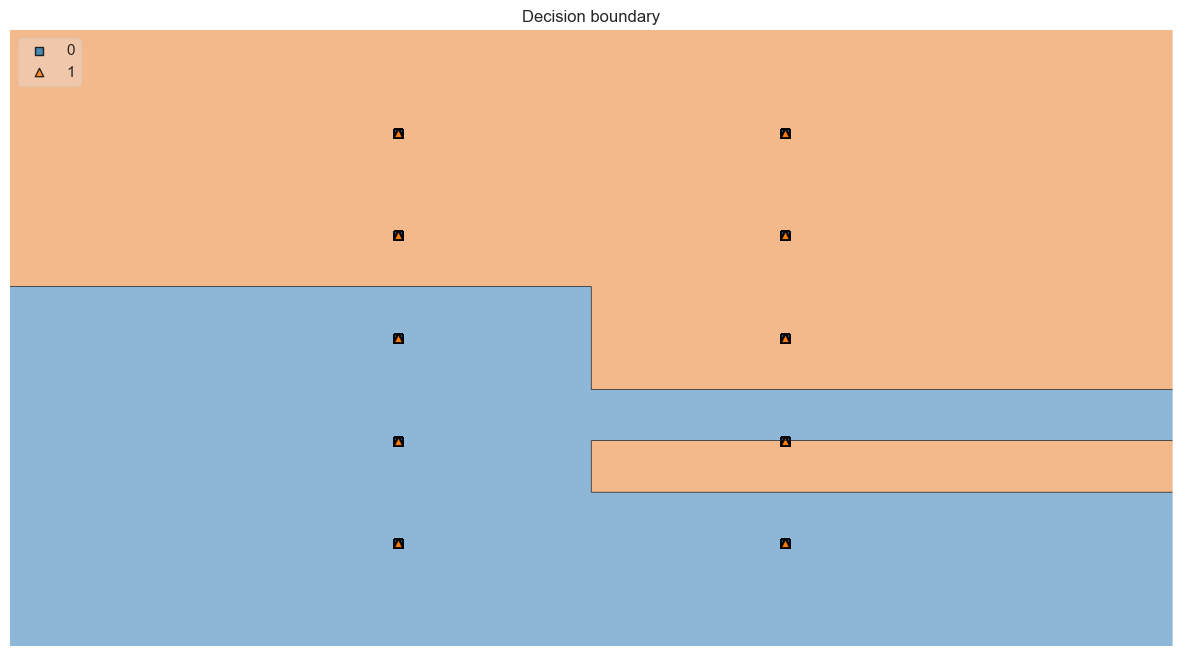

In [29]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5 


ax = plot_decision_regions(np.array(x_train), np.array(y_training), 
                      clf=model, 
                      feature_index=[0, 1],
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2)                 
                     
plt.title("Decision boundary")
plt.xticks([])
plt.yticks([])

C:\Users\Teerawat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


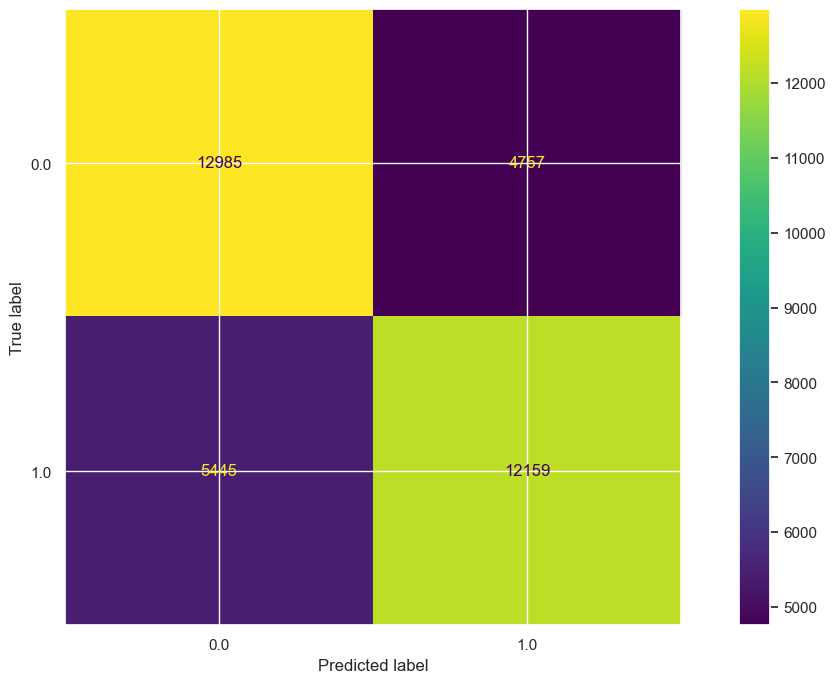

In [30]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [31]:
y_pred_test = clf.predict(x_test)
report = classification_report(y_test, y_pred_test, output_dict=True)

print(report["accuracy"])

0.7113676229276297


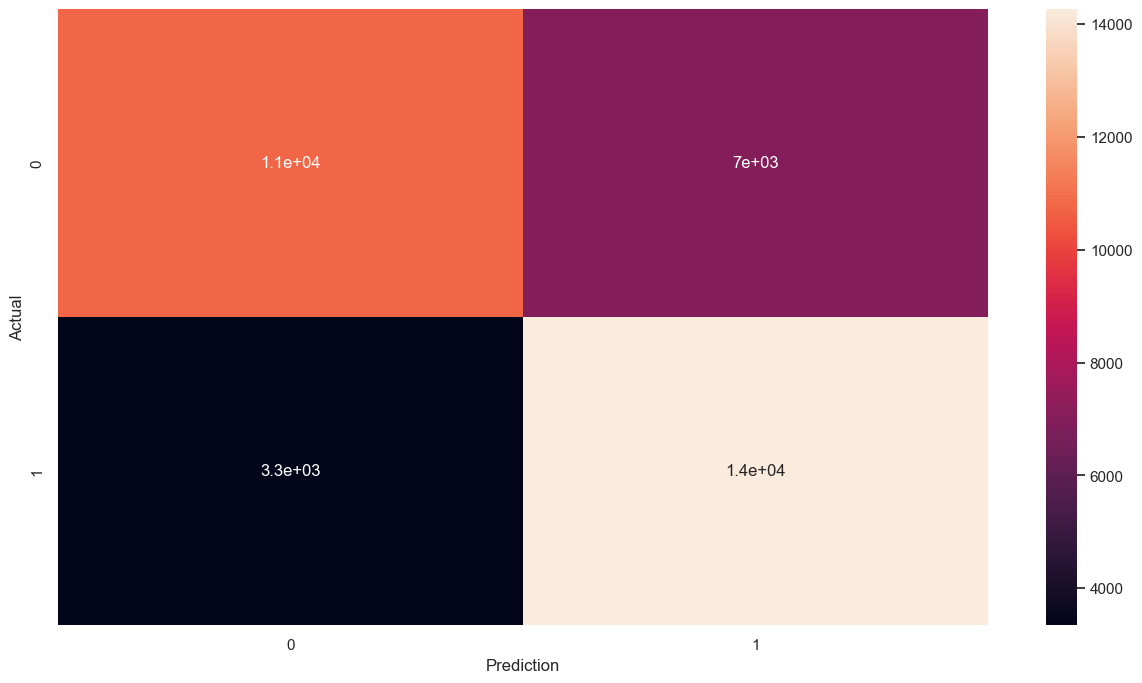

0.7073784869575058


In [32]:
acc = accuracy_score(y_test, y_predicted)
cm =confusion_matrix(y_test, y_predicted)

ax = plt.subplot()
sns.heatmap(cm, annot=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

print(acc)

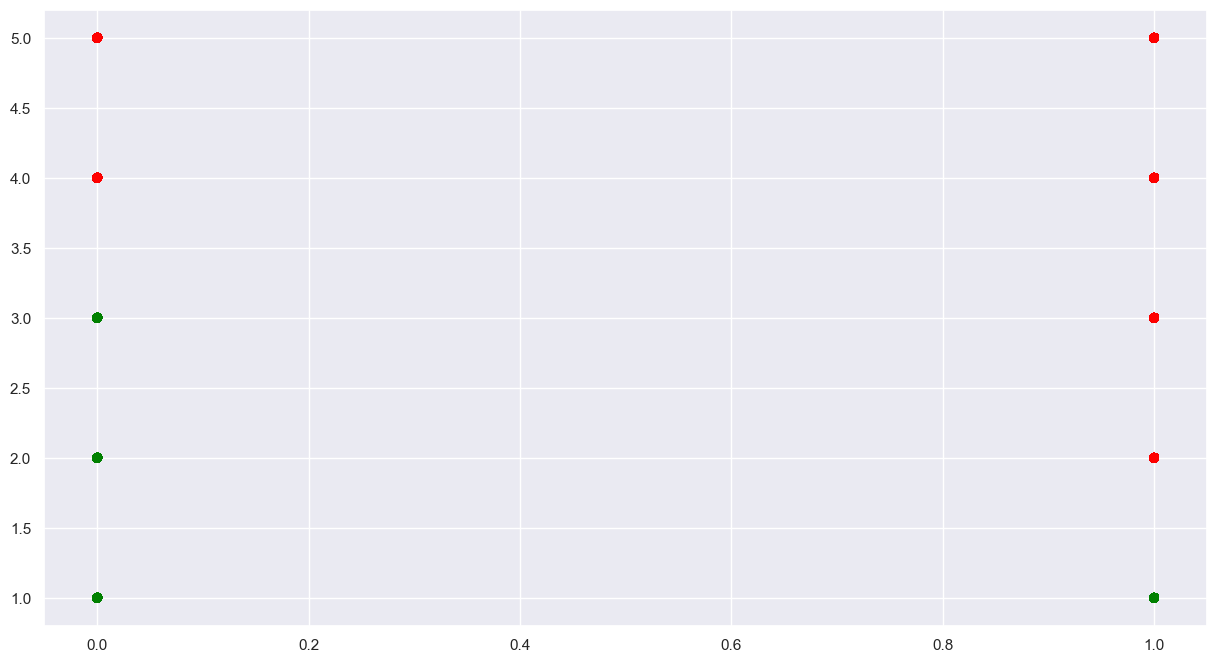

In [33]:
c = ["green","red"]
label = []
for color in y_predicted:
    
    label.append(int(color))
    
colors = [c[i] for i in label]
%matplotlib inline
plt.scatter(x_test['HighBP'],x_test['GenHlth'], color=colors)


plt.show()



HighBp:123
GenHlth22
Diabete Prediction = Low Risk


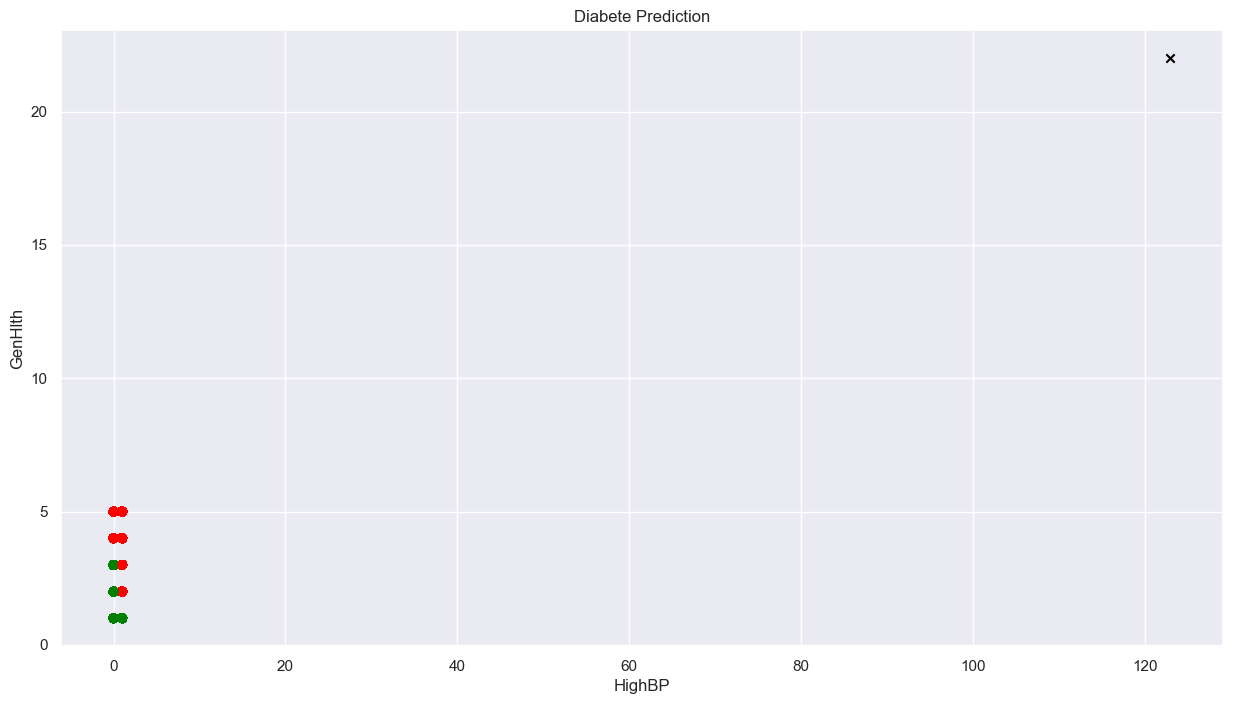

In [34]:
x1 = int(input("HighBp:"))
x2 = int(input("GenHlth"))


x_user = pd.DataFrame(np.c_[x1, x2], columns=['HighBP','GenHlth'])

user_prediction = model.predict(x_user)
if user_prediction == 0:
    ans = "High Risk"
else:
    ans = "Low Risk"

print("Diabete Prediction =",ans)

plt.scatter(x_test['HighBP'],x_test['GenHlth'], color=colors)
plt.scatter(x1, x2, marker="x", color="black")
plt.title("Diabete Prediction")
plt.xlabel('HighBP')
plt.ylabel('GenHlth')
plt.show()